# Medical Data Visualizer

The dataset values were collected during medical examinations.
The rows in the dataset represent patients and the columns represent
information like body measurements, results from various
blood tests, and lifestyle choices.

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Data

In [2]:
data = pd.read_csv('medical_examination.csv')

#### Adding Overweight Column

If the person BMI is higher than 25 then the person is overweight.

In [3]:
data['overweight'] = data.loc[:, 'weight'] / ((data.loc[:, 'height'] / 100) ** 2)
data.loc[data['overweight'] > 25, 'overweight'] = 1
data.loc[data['overweight'] != 1, 'overweight'] = 0
data['overweight'] = data['overweight'].astype('int8')

#### Normalizing Cholesterol and Glucose Columns

In [4]:
data.loc[data['cholesterol'] == 1, 'cholesterol'] = 0
data.loc[data['cholesterol'] != 0, 'cholesterol'] = 1
data.loc[data['gluc'] == 1, 'gluc'] = 0
data.loc[data['gluc'] != 0, 'gluc'] = 1
data[['cholesterol', 'gluc']] = data[['cholesterol', 'gluc']].astype('int8')
data[['cardio', 'smoke', 'alco', 'active']] = data[['cardio', 'smoke', 'alco', 'active']].astype('int8')
data['gender'] = data['gender'].astype('int8')
data[['height', 'weight']] = data[['height', 'weight']].astype('int16')
data['ap_lo'] = data['ap_lo'].astype('int16')

#### Categorical Plot Drawing

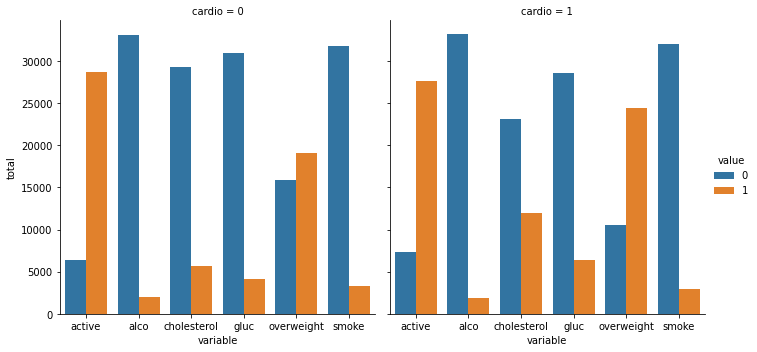

In [5]:
def draw_cat_plot() -> object:
    df_cat = pd.melt(data,
                     id_vars=['cardio'],
                     value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    
    fig = sns.catplot(data=df_cat, x='variable', hue='value', col='cardio', kind='count',
                    order=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
    fig.set_ylabels('total')
    fig.savefig('catplot.png')
    
    return fig

print(draw_cat_plot())

#### Heat Map Drawing

Figure(792x648)


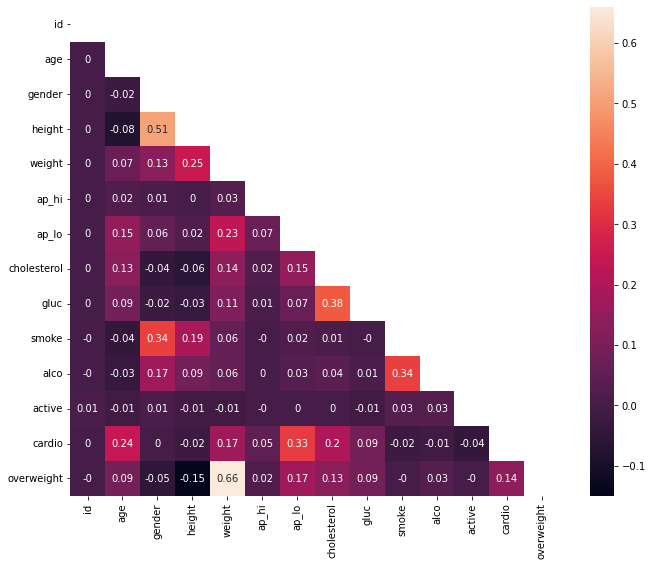

In [26]:
def draw_heat_map() -> object:
    df_heat = data.drop(data.loc[data['ap_lo'] > data['ap_hi'], ['ap_lo', 'ap_hi']].index)
    df_heat = df_heat.drop(df_heat.loc[data['height'] < df_heat['height'].quantile(0.025), 'height'].index)
    df_heat = df_heat.drop(df_heat.loc[data['height'] > df_heat['height'].quantile(0.975), 'height'].index)
    df_heat = df_heat.drop(df_heat.loc[data['weight'] < data['weight'].quantile(0.025), 'weight'].index)
    df_heat = df_heat.drop(df_heat.loc[data['weight'] > data['weight'].quantile(0.975), 'weight'].index)
    
    corr = round(df_heat.corr(), 2)
    mask = np.triu(np.ones_like(corr, dtype='bool'))
    f, ax = plt.subplots(figsize=(11, 9))
    hmap = sns.heatmap(corr, mask=mask, square=True, annot=True)
    fig = hmap.get_figure()
    fig.savefig('heatmap.png')
    
    return fig

print(draw_heat_map())